    ### Pandas 패키지를 활용한 데이터 프레임 구조, 및 주식데이터 그리기

In [ ]:
import pandas as pd

kakao=pd.Series([92600,92400,92100,94300,92300])
print(kakao)

In [ ]:
kakao2=pd.Series([92600,92400,92100,94300,92300], index=['2016-02-19','2016-02-18','2016-02-17','2016-02-16','2016-02-15'])
print(kakao2)

In [ ]:
print(kakao2['2016-02-19'])

In [ ]:
for date in kakao2.index:
    print(date)

for ending_price in kakao2.values:
    print(ending_price)


In [ ]:
jeong=pd.Series([10,20,30], index=['AAPL','KAKAO','SAMSUNG'])
baek=pd.Series([20,30,40], index=['SAMSUNG','KAKAO','AAPL'])

merge= jeong + baek
print(merge)


In [ ]:
#pd.DataFrame을 사용하면 엑셀형태로 표현이 가능하다.

data1={'col0':[1,2,3,4],'col1':[10,20,30,40],'col2':[100,200,300,400]}

data=pd.DataFrame(data1)

print(data)

In [ ]:
daeshin = {'open':  [11650, 11100, 11200, 11100, 11000],
           'high':  [12100, 11800, 11200, 11100, 11150],
           'low' :  [11600, 11050, 10900, 10950, 10900],
           'close': [11900, 11600, 11000, 11100, 11050]}

daeshin_day=pd.DataFrame(daeshin)
print(daeshin_day)


In [ ]:
date = ['16.02.29', '16.02.26', '16.02.25', '16.02.24', '16.02.23']
daeshin = pd.DataFrame({'open':  [11650, 11100, 11200, 11100, 11000],
           'high':  [12100, 11800, 11200, 11100, 11150],
           'low' :  [11600, 11050, 10900, 10950, 10900],
           'close': [11900, 11600, 11000, 11100, 11050]},index=date)
print(daeshin)

In [ ]:
#데이터 프레임에ㅔ서는 키값으로 출력이 안됨

# print(daeshin['16.02.29'])

### DataFrame 객체의 칼럼에 접근하려면 칼럼 이름을 지정하면 되고, 로우에 접근하려면 loc 메서드를 통해 인덱스 값을 지정하면 됩니다.

In [ ]:
a=daeshin.loc['16.02.24']
print(a)

#### 그래프 그리기 연습!

<function matplotlib.pyplot.show(close=None, block=None)>

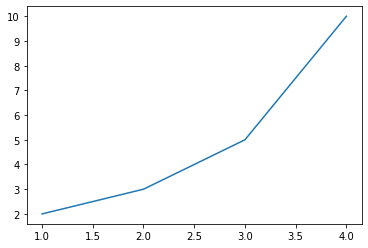

In [4]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4],[2,3,5,10])
plt.show

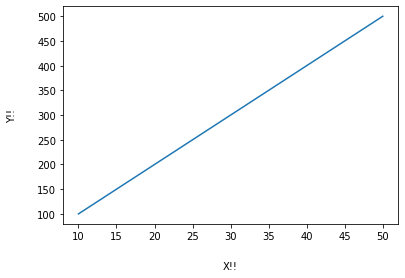

In [5]:
data_1={'data_x':[10,20,30,40,50],'data_y': [100,200,300,400,500]}
#그래프 숫자와 레이블 사이의 여백을 주는 방법
plt.plot('data_x','data_y',data=data_1)
plt.xlabel('X!!',labelpad=20)
plt.ylabel('Y!!',labelpad=20)
plt.show()

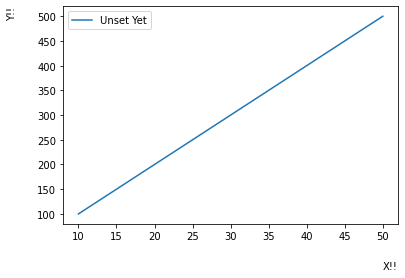

In [6]:
data_1={'data_x':[10,20,30,40,50],'data_y': [100,200,300,400,500]}
#그래프 레이블의 위치 지정/ legend 저장까지
plt.plot('data_x','data_y',data=data_1, label='Unset Yet')#여기서의 레이블른 레전드 이름
plt.xlabel('X!!',labelpad=20,loc='right')
plt.ylabel('Y!!',labelpad=20,loc='top')
plt.legend() #표시해주는 함수
plt.show()

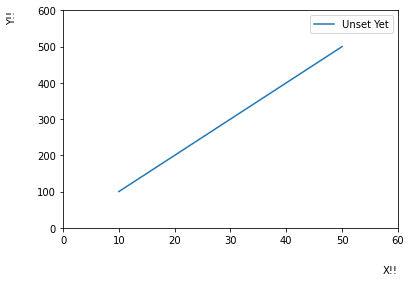

In [7]:
data_1={'data_x':[10,20,30,40,50],'data_y': [100,200,300,400,500]}
plt.plot('data_x','data_y',data=data_1, label='Unset Yet')
plt.xlabel('X!!',labelpad=20,loc='right')
plt.ylabel('Y!!',labelpad=20,loc='top')
plt.legend()
plt.xlim([0,60]) #plt.axis([0,60,0,600]) 과 같음 
plt.ylim([0,600])
plt.show()

### 이평선 구하고 그리기

In [ ]:
import pandas as pd
import pandas_datareader as dt

sm=dt.DataReader("005930.KS","yahoo","2020-01-01","2022-01-20")
sm_exemptv0=sm[sm['Volume']!=0] #거래량이 0인 값들을 제외한다는 코드/ 쉽게 데이터를 분류할 수 있는 장점
ma5=sm_exemptv0['Adj Close'].rolling(window=5).mean()
ma20=sm_exemptv0['Adj Close'].rolling(window=20).mean()
ma60=sm_exemptv0['Adj Close'].rolling(window=60).mean()
ma120=sm_exemptv0['Adj Close'].rolling(window=120).mean()
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA5",ma5) #insert(칼럼 추가할 위치, 칼럼 이름, 칼럼 데이터
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA20",ma20)
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA60",ma60)
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA120",ma120)
sm_exemptv0.tail(5)

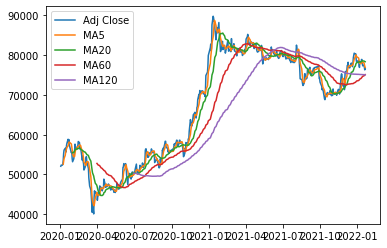

In [21]:
plt.plot(sm_exemptv0.index,sm_exemptv0['Adj Close'],label='Adj Close')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA5'],label='MA5')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA20'],label='MA20')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA60'],label='MA60')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA120'],label='MA120')
plt.xlabel('Timeline',labelpad=10)
plt.ylabel('Price',labelpad=10)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import pandas_datareader as dt
import matplotlib.pyplot as plt

 # 리스트 만들고 for 문 돌리면서 각각의 그래프 만들어주는거 해보자

sm=dt.DataReader("005930.KS","yahoo","2020-01-01","2022-01-20")
sm_exemptv0=sm[sm['Volume']!=0] #거래량이 0인 값들을 제외한다는 코드/ 쉽게 데이터를 분류할 수 있는 장점
ma5=sm_exemptv0['Adj Close'].rolling(window=5).mean()
ma20=sm_exemptv0['Adj Close'].rolling(window=20).mean()
ma60=sm_exemptv0['Adj Close'].rolling(window=60).mean()
ma120=sm_exemptv0['Adj Close'].rolling(window=120).mean()

sm_exemptv0.insert(len(sm_exemptv0.columns),"MA5",ma5) #insert(칼럼 추가할 위치, 칼럼 이름, 칼럼 데이터
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA20",ma20)
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA60",ma60)
sm_exemptv0.insert(len(sm_exemptv0.columns),"MA120",ma120)


plt.plot(sm_exemptv0.index,sm_exemptv0['Adj Close'],label='Adj Close')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA5'],label='MA5')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA20'],label='MA20')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA60'],label='MA60')
plt.plot(sm_exemptv0.index,sm_exemptv0['MA120'],label='MA120')
plt.xlabel('Timeline',labelpad=10,loc='right')
plt.ylabel('Price',labelpad=10,loc='top')
plt.legend()
plt.show()

ka=dt.DataReader("035720.KS","yahoo","2020-01-01","2022-01-20")


In [ ]:
import matplotlib.pyplot as plt



In [ ]:
plt.figure()

#figure 해야지 2개로 분할 가능

In [7]:
import mplfinance as mpf
sm=dt.DataReader("005930.KS","yahoo","2020-01-01","2022-01-20")
mpf.plot(sm,type='candle',mav=(3,6,9),volume=True)

NameError: name 'dt' is not defined